Task 1 - Exploration of customer purchasing behavior

Exploratory data analysis is the lifeblood of every meaningful machine learning project. 
It helps us unravel the nature of the data and sometimes informs how you go about modelling. 
A careful exploration of the data encapsulates checking all available features, checking their interactions 
and correlation as well as their variability with respect to the target. 


## Objective 1: EDA on the given Data set

In [17]:
# importing the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
import warnings
warnings.filterwarnings(action="ignore")


In [50]:
c = '#386B7F' # basic color for plots

In [19]:
train_data = pd.read_csv('../data/train.csv')
test_data =  pd.read_csv('../data/test.csv')
store_data = pd.read_csv('../data/store.csv')


Convert all categorical columns to object across the three datasets

In [24]:
# helper function we are going to use to convert all categorical columns to object across the given datasets
def convert_cat_cols_obj(dataset, col_lst):
    for i in col_lst: 
        dataset = dataset.astype({i:'object'})
    return dataset

In [25]:
## Converting categorical columns in train set into object
train_cols = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday']
train_data = convert_cat_cols_obj(train_data, train_cols)

In [26]:
## Converting categorical columns in train set into object
test_cols = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday']
test_data = convert_cat_cols_obj(test_data, test_cols)

In [27]:
## Converting categorical columns in store set into object
store_cols = ['StoreType','Assortment','CompetitionOpenSinceMonth','Promo2']
store_data = convert_cat_cols_obj(store_data, store_cols)

In [28]:
## Dealing with cardinality
train_data['StateHoliday'].replace({0:'o','0':'o'},inplace=True)
test_data['StateHoliday'].replace({'0':'o'},inplace=True)

## 1. Understanding the data

In [20]:
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [21]:
test_data.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [22]:
store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [29]:
store_data.describe() # showing only the integer object description

,Store,CompetitionDistance,CompetitionOpenSinceYear,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,571.000000,571.000000
mean,558.00000,5404.901079,2008.668857,23.595447,2011.763573
std,322.01708,7663.174720,6.195983,14.141984,1.674935
min,1.00000,20.000000,1900.000000,1.000000,2009.000000
25%,279.50000,717.500000,2006.000000,13.000000,2011.000000
50%,558.00000,2325.000000,2010.000000,22.000000,2012.000000
75%,836.50000,6882.500000,2013.000000,37.000000,2013.000000
max,1115.00000,75860.000000,2015.000000,50.000000,2015.000000


In [30]:
train_data.describe() # showing only the integer object description

,Store,Sales,Customers
count,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,5.773819e+03,6.331459e+02
std,3.219087e+02,3.849926e+03,4.644117e+02
min,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,3.727000e+03,4.050000e+02
50%,5.580000e+02,5.744000e+03,6.090000e+02
75%,8.380000e+02,7.856000e+03,8.370000e+02
max,1.115000e+03,4.155100e+04,7.388000e+03


In [31]:
test_data.describe() # showing only the integer object description

,Id,Store
count,41088.000000,41088.000000
mean,20544.500000,555.899533
std,11861.228267,320.274496
min,1.000000,1.000000
25%,10272.750000,279.750000
50%,20544.500000,553.500000
75%,30816.250000,832.250000
max,41088.000000,1115.000000


In [32]:
train_data.shape #shows row by column value of the train dataset

(1017209, 9)

In [33]:
test_data.shape #shows row by column value of the test dataset

(41088, 8)

In [34]:
store_data.shape #shows row by column value of the store dataset

(1115, 10)

understanding for each column what unique value we have for train test and store data sets

In [35]:
store_data.nunique()

Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           654
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear       23
Promo2                          2
Promo2SinceWeek                24
Promo2SinceYear                 7
PromoInterval                   3
dtype: int64

In [36]:
train_data.nunique()

Store             1115
DayOfWeek            7
Date               942
Sales            21734
Customers         4086
Open                 2
Promo                2
StateHoliday         4
SchoolHoliday        2
dtype: int64

In [37]:
test_data.nunique()

Id               41088
Store              856
DayOfWeek            7
Date                48
Open                 2
Promo                2
StateHoliday         2
SchoolHoliday        2
dtype: int64

Note: from above we can see that our columns respective unique values
this will help us in identifying which value we should use for visualization

In [39]:
print("Joining/merging train set with an additional store information.")

# by specifying inner join we make sure that only those observations 
# that are present in both train and store sets are merged together
train_store = pd.merge(train_data, store_data, how = 'inner', on = 'Store')

print("In total: ", train_store.shape)
train_store.head()


Joining/merging train set with an additional store information.
In total:  (1017209, 18)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,o,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,o,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,o,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,o,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,o,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


## 1. Check for seasonality in both training and test sets - are the seasons similar between these two groups?

###  seasonality check series for Training dataset

In [40]:
time_series_train = train_data[['Date','Sales']]

In [41]:
time_series_train.head()

,Date,Sales
0,2015-07-31,5263
1,2015-07-31,6064
2,2015-07-31,8314
3,2015-07-31,13995
4,2015-07-31,4822


In [42]:
time_series_train['datetime'] = pd.to_datetime(time_series_train['Date'])
time_series_train = time_series_train.set_index('datetime')
time_series_train.drop(['Date'], axis=1, inplace=True)
time_series_train.head()

,Sales
datetime,
2015-07-31,5263
2015-07-31,6064
2015-07-31,8314
2015-07-31,13995
2015-07-31,4822


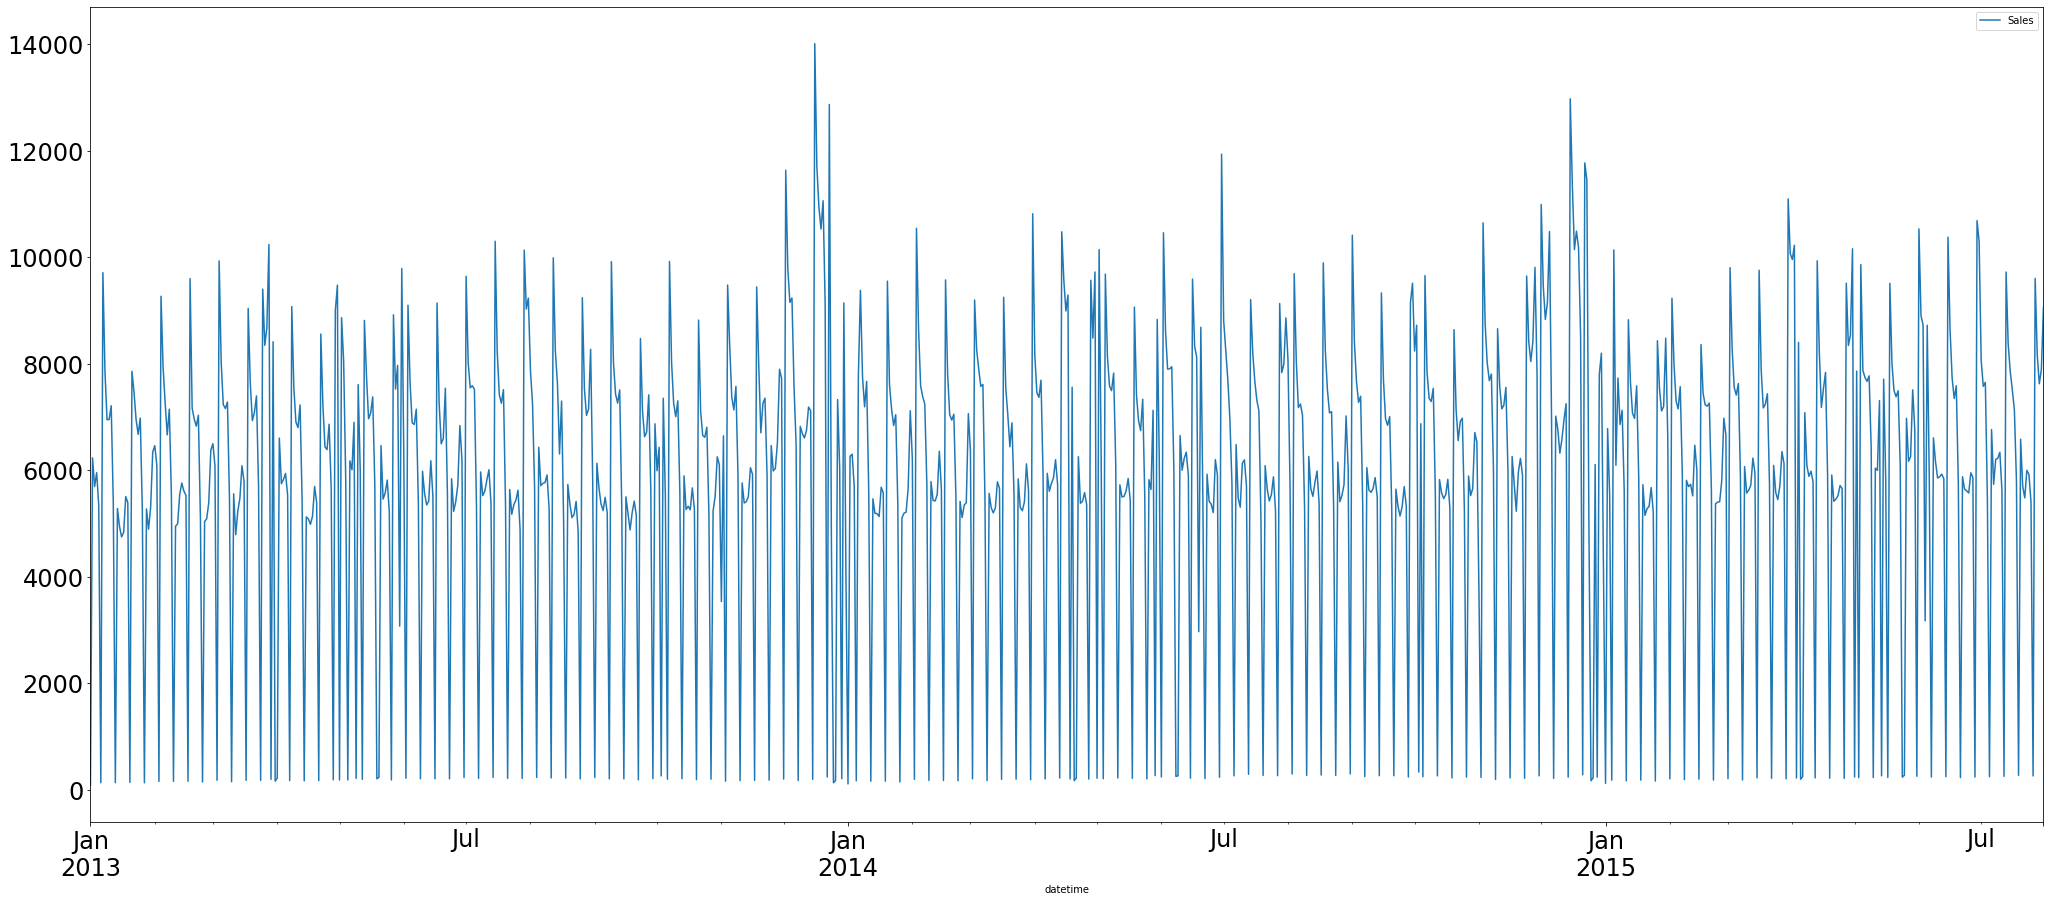

In [49]:
time_series_train_day = time_series_train.resample('D').mean()
time_series_train_day.plot(figsize=(35,15), fontsize=24)
plt.show()

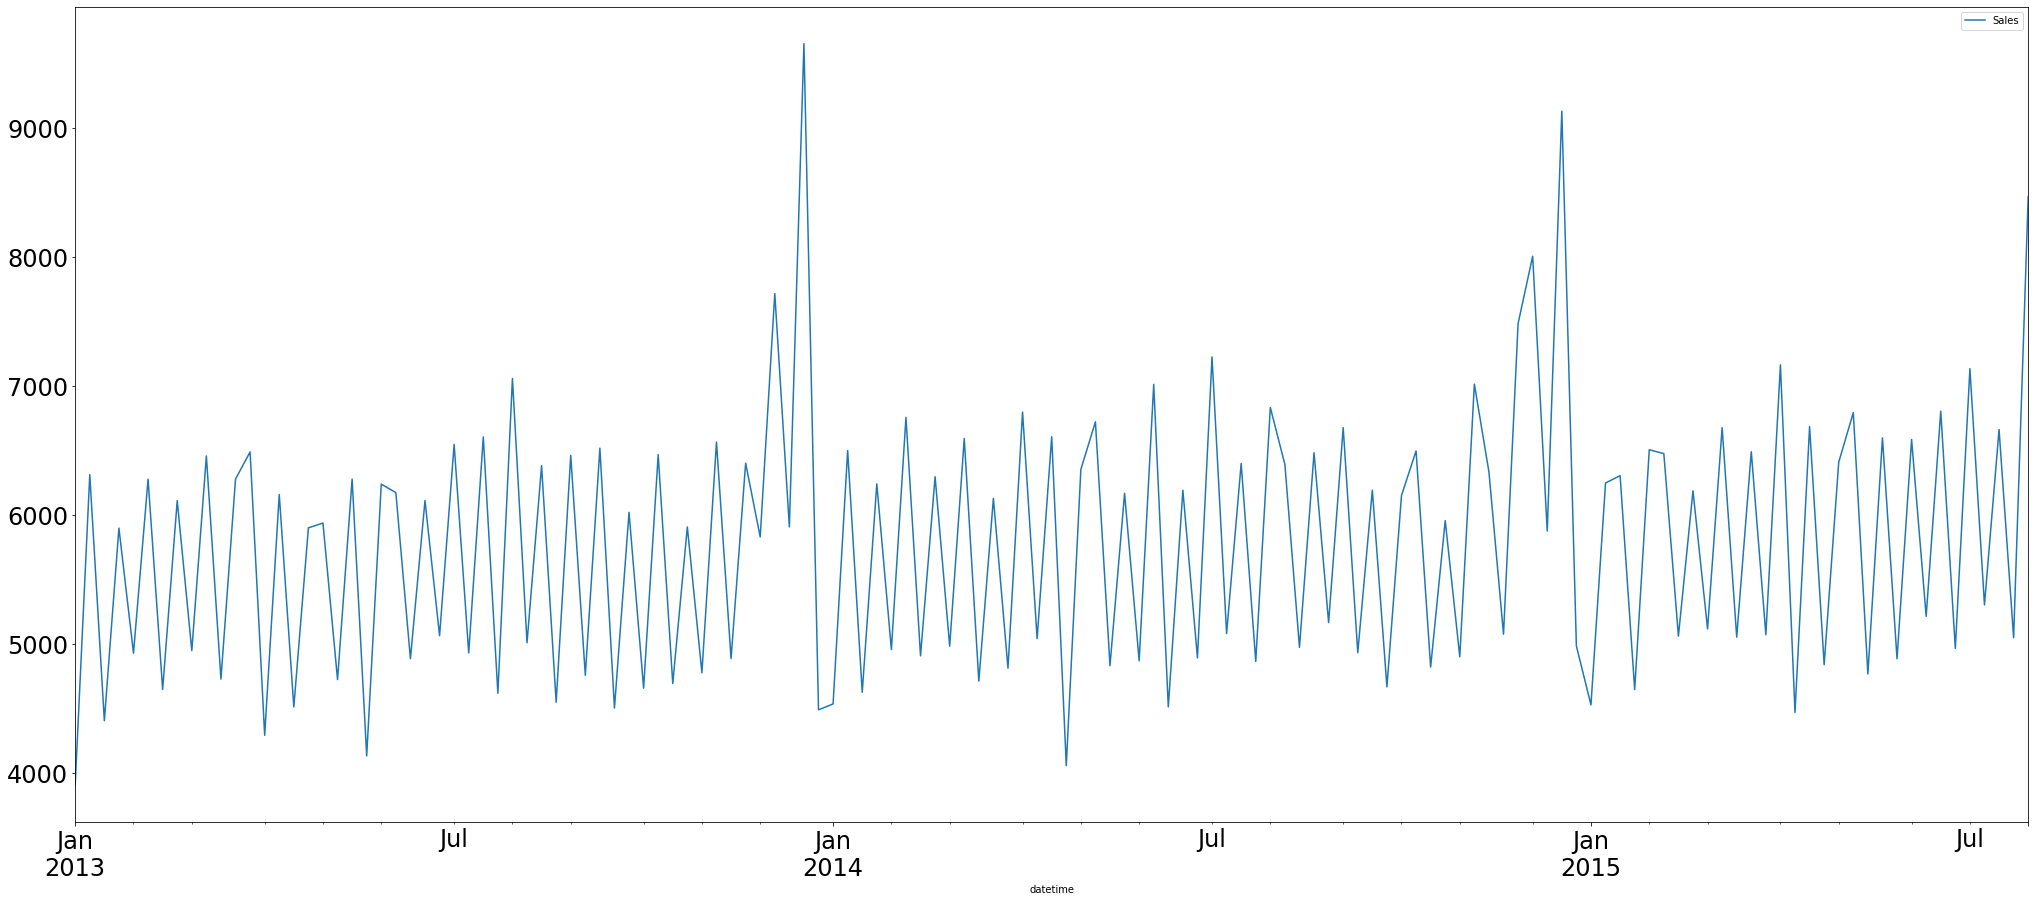

In [44]:
time_series_train_week = time_series_train.resample('W').mean()
time_series_train_week.plot(figsize=(35,15), fontsize=24)
plt.show()

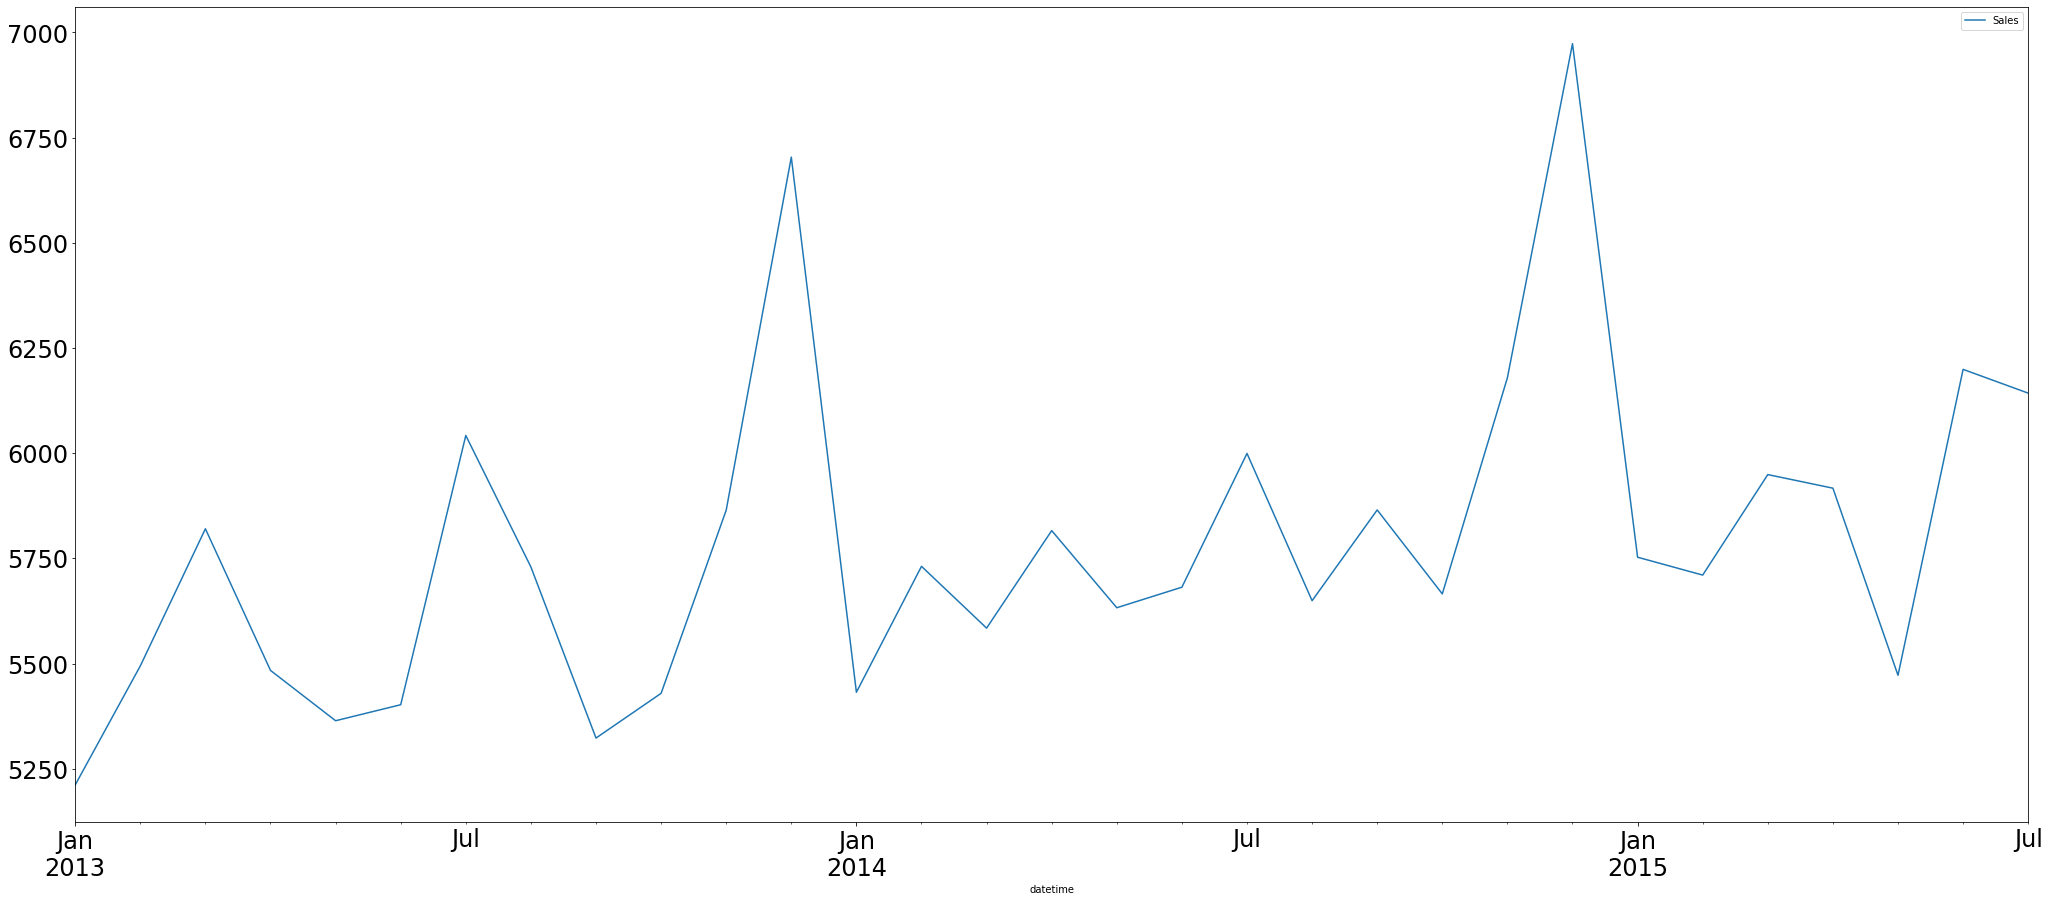

In [68]:
time_series_train_month = time_series_train.resample('M').mean()
time_series_train_month.plot(figsize=(35,15), fontsize=24)
plt.show()

##  seasonality check of data series for test dataset

In [69]:
# time_series_test = test_data[['Date','Sales']]
test_data.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,o,0
1,2,3,4,2015-09-17,1.0,1,o,0
2,3,7,4,2015-09-17,1.0,1,o,0
3,4,8,4,2015-09-17,1.0,1,o,0
4,5,9,4,2015-09-17,1.0,1,o,0
